In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Se carga la data
data=pd.read_csv(r'C:\Users\jarly\OneDrive\Documentos\UNAD\Análisis de Datos\Fase 4\Mall_Customers.csv', sep=',')
data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

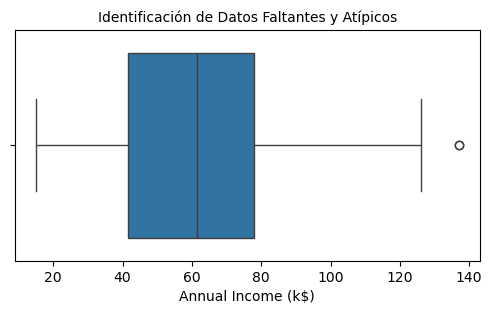

In [7]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)



Estadísticas descriptivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


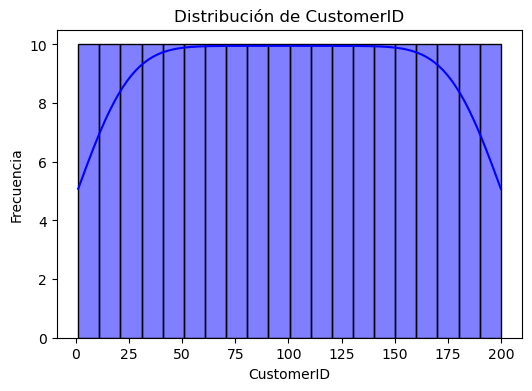

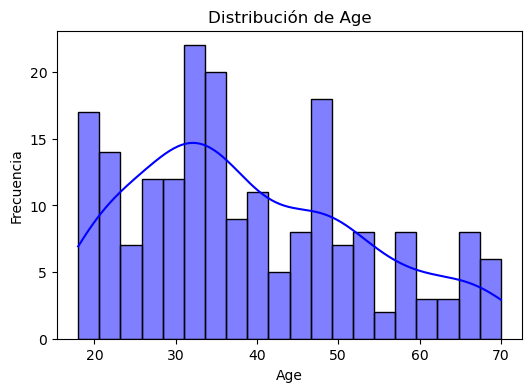

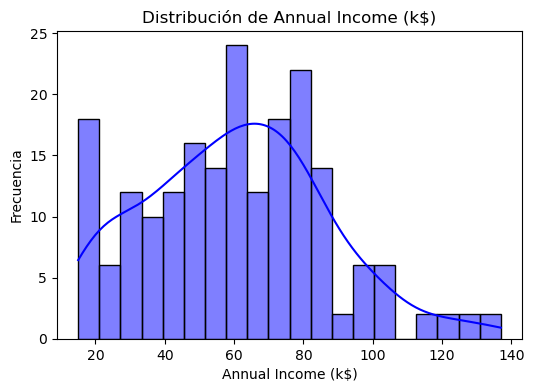

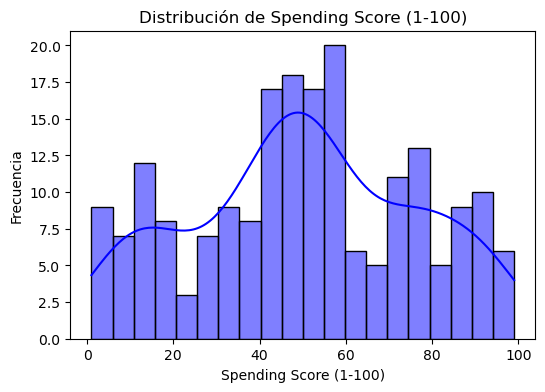

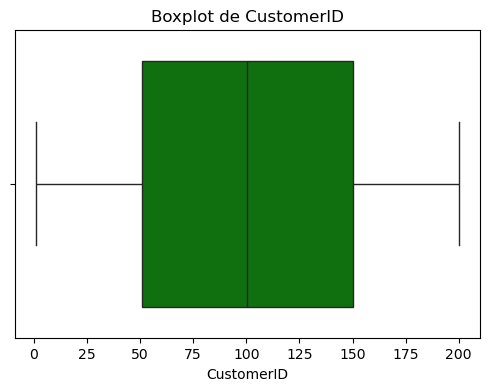

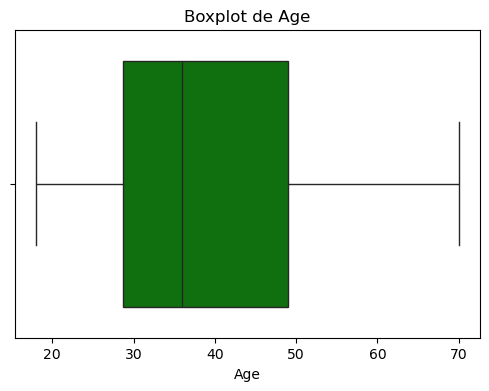

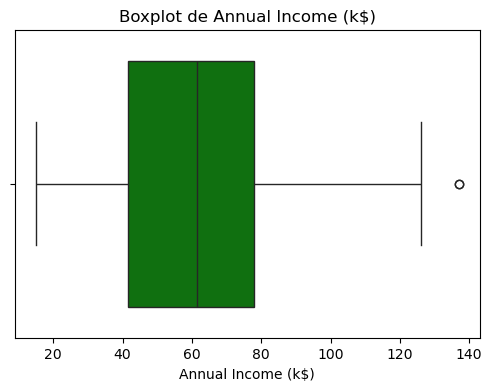

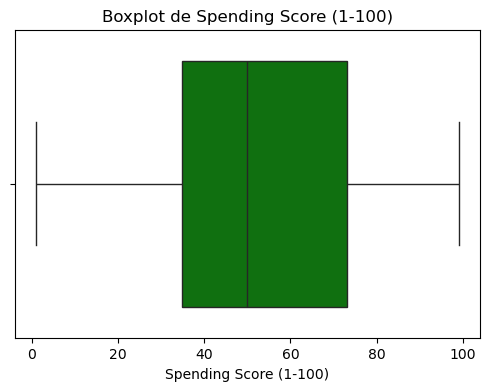

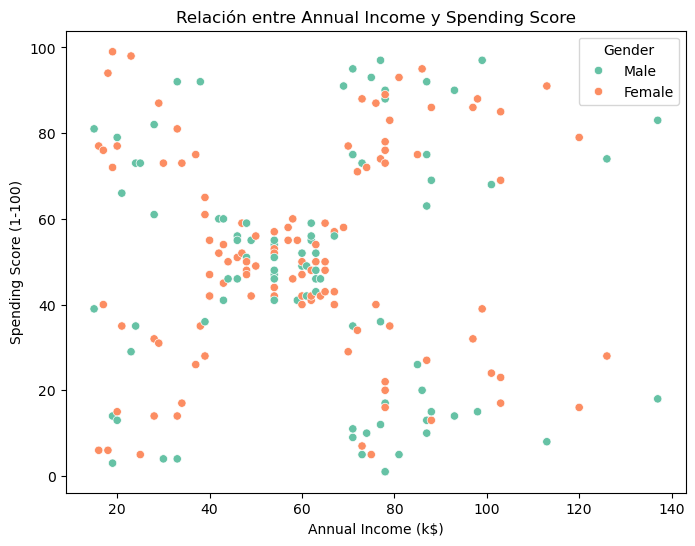

In [9]:

# Análisis estadístico básico
print("\nEstadísticas descriptivas:")
print(data.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Histograma para la distribución de cada variable numérica
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Gráficas de caja (boxplots) para detectar valores atípicos
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column], color='green')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

# Gráfico de dispersión entre variables 
if 'Annual Income (k$)' in data.columns and 'Spending Score (1-100)' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
    plt.title('Relación entre Annual Income y Spending Score')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Gender')
    plt.show()


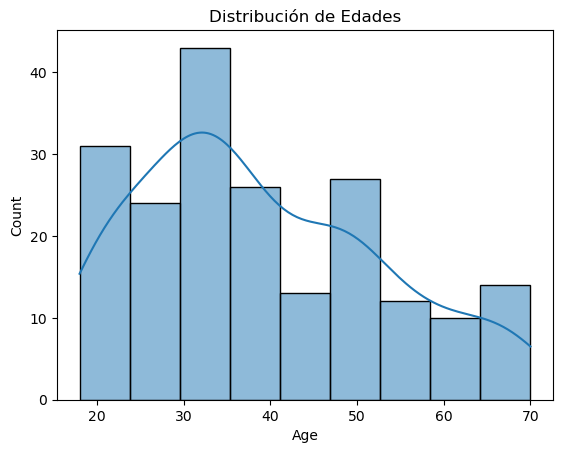

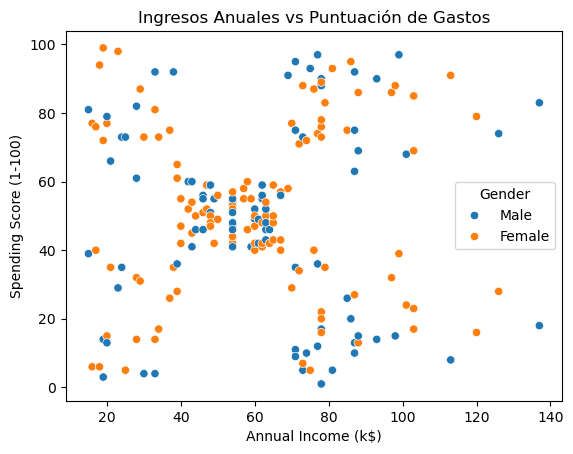

In [23]:
# Visualización de la distribución de edades 
sns.histplot(data['Age'], kde=True) 
plt.title('Distribución de Edades')
plt.show() 
# Relación entre Ingresos Anuales y Puntuación de Gastos 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender')
plt.title('Ingresos Anuales vs Puntuación de Gastos')
plt.show()

In [43]:


# Tratar valores faltantes (si los hay)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Codificación de variables categóricas
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Selección de características relevantes
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]



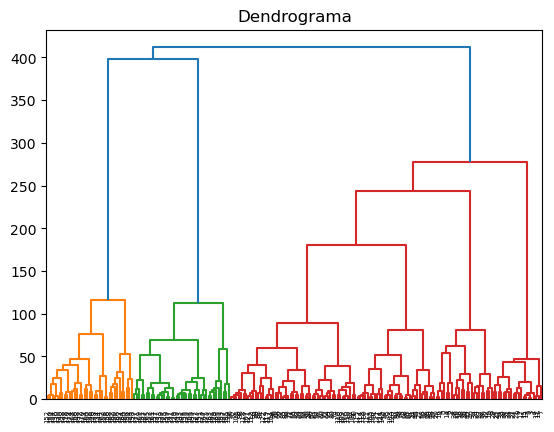

Silhouette Score: 0.38141795042544546
Calinski-Harabasz Index: 111.4623243273518


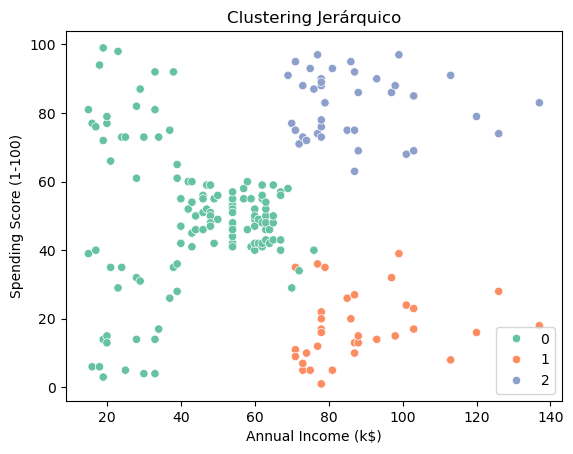

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Crear el modelo de clustering jerárquico
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.show()

# Entrenar el modelo
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X)

# Evaluar el modelo
silhouette_avg_hc = silhouette_score(X, hc_labels)
calinski_harabasz_hc = calinski_harabasz_score(X, hc_labels)
print(f'Silhouette Score: {silhouette_avg_hc}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_hc}')

# Visualización de resultados
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=hc_labels, data=data, palette='Set2')
plt.title('Clustering Jerárquico')
plt.show()

